## EDA Notebook

Notebook to do data cleaning and exploratory analysis of data.

### Library Imports 

In [1]:
#-------- Core 
import pandas as pd
import numpy as np

#-------- Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#-------- Optional Statistics
import scipy.stats as stats

### Dataset Import

In [2]:
bbc_train = pd.read_csv("../data/raw/BBC_News_Train.csv")
bbc_test = pd.read_csv("../data/raw/BBC_News_Test.csv")


In [3]:
display(bbc_train)  #Articleid, Text, Category  1490 rows
display(bbc_test)   #Articleid, Text, Category  735 rows

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...
...,...,...
730,1923,eu to probe alitalia state aid the european ...
731,373,u2 to play at grammy awards show irish rock ba...
732,1704,sport betting rules in spotlight a group of mp...
733,206,alfa romeos to get gm engines fiat is to sto...


In [4]:
train_df = bbc_train.copy(deep=True)
test_df = bbc_test.copy(deep=True)

## Exploratory Data Analysis

* Check basic info 
* Check number of unique categories
* Confirm data types
* Check for null or empty fields in article id, text, or category
* Check text length per item and length distribution
* Check distribution of articles across categories (Test dataset does not have categories so this won't be possible to do for that set)


In [5]:

def explore_dataframe(df, name="Dataset"):
    
    # Display dataset information, integrity checks, and distribution plots
    # for a given dataframe.
    
    # Parameters:
    # -----------
    # df : pandas.DataFrame
        # The dataframe to analyze (must have columns 'Text', 'ArticleId', 'Category').
        # name : str
            # Name of the dataset (e.g. 'Raw', 'Cleaned') to display in titles.
    
    
    print("="*80)
    print(f"Exploring {name}")
    print("="*80)
    
    # Info
    print("\n--- DataFrame Info ---")
    df.info()
    
    # Word count + text length
    df['Word_count'] = df['Text'].apply(lambda x: len(str(x).split()))
    df['text_length'] = df['Text'].apply(lambda x: len(str(x)))
    
    print("\n--- Word Count  ---")
    print(df['Word_count'].describe())
    
    print("\n--- Text Length ---")
    print(df['text_length'].describe())
    
    # Nulls and empty strings
    print("\n--- Missing Values ---")
    print("Number of null texts:", df['Text'].isnull().sum())
    print("Number of empty article texts:", (df['Text'].str.strip()=='').sum())
    
    if "ArticleId" in df.columns:
        print("Number of null article IDs:", df['ArticleId'].isnull().sum())
    
    if "Category" in df.columns:
        print("Number of null Category:", df['Category'].isnull().sum())
        print("Number of empty Category:", (df['Category'].str.strip()=='').sum())
        
        print('Total Categories: ', len(df['Category'].unique()))
        print('Categories: ', np.unique(df['Category']))
        
        # Balance check
        plt.figure(figsize=(10,8))
        sns.histplot(data=df, x='Category', hue='Category', legend=True, palette='pastel')
        plt.title('Number of Articles Per Category')
        plt.xlabel('Category')
        plt.ylabel('Number of Articles')
        plt.show()
        
        # Distribution of word count by category
        plt.figure(figsize=(10,8))
        sns.violinplot(data=df, 
                       x='Category', 
                       y='Word_count',
                       hue='Category', 
                       palette="pastel", 
                       inner='quartile')
        plt.title("Distribution of Word Counts by Category")
        plt.xlabel("Category")
        plt.ylabel("Word Count")
        plt.show()
    
    # General distributions (applies to both train & test)
    sns.histplot(df['Word_count'])
    plt.title("Distribution of Article Word Counts")
    plt.xlabel("Number of Words")
    plt.ylabel("Number of Articles")
    plt.show()


Exploring Raw Train Dataset

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB

--- Word Count  ---
count    1490.000000
mean      385.012752
std       210.898616
min        90.000000
25%       253.000000
50%       337.000000
75%       468.750000
max      3345.000000
Name: Word_count, dtype: float64

--- Text Length ---
count     1490.000000
mean      2233.461745
std       1205.153358
min        501.000000
25%       1453.000000
50%       1961.000000
75%       2751.250000
max      18387.000000
Name: text_length, dtype: float64

--- Missing Values ---
Number of null texts: 0
Number of empty article texts: 0
Number of null article IDs: 0
Number of null Category: 0
Numbe

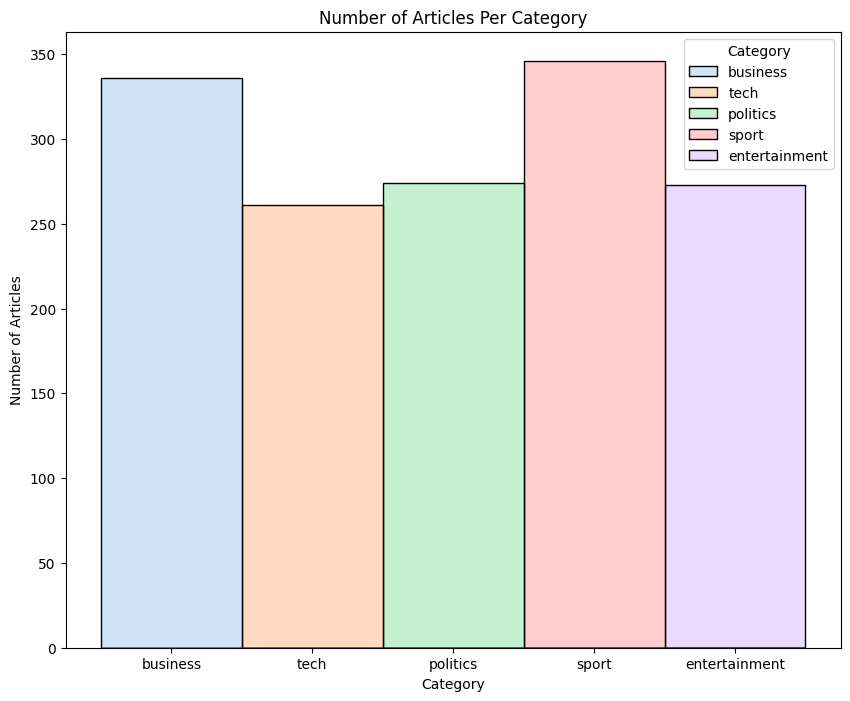

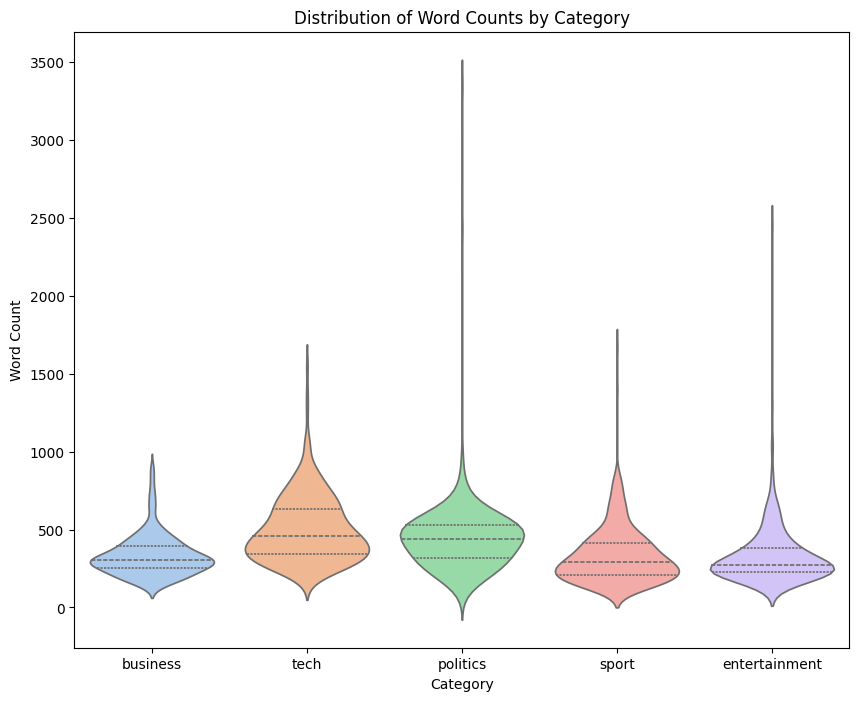

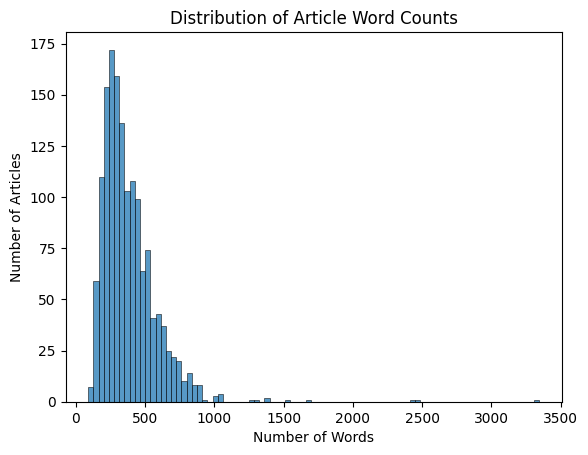

Exploring Raw Test Dataset

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB

--- Word Count  ---
count     735.000000
mean      401.004082
std       294.423163
min       126.000000
25%       246.500000
50%       337.000000
75%       491.000000
max      4492.000000
Name: Word_count, dtype: float64

--- Text Length ---
count      735.000000
mean      2322.687075
std       1639.029711
min        727.000000
25%       1431.500000
50%       1979.000000
75%       2865.500000
max      25483.000000
Name: text_length, dtype: float64

--- Missing Values ---
Number of null texts: 0
Number of empty article texts: 0
Number of null article IDs: 0


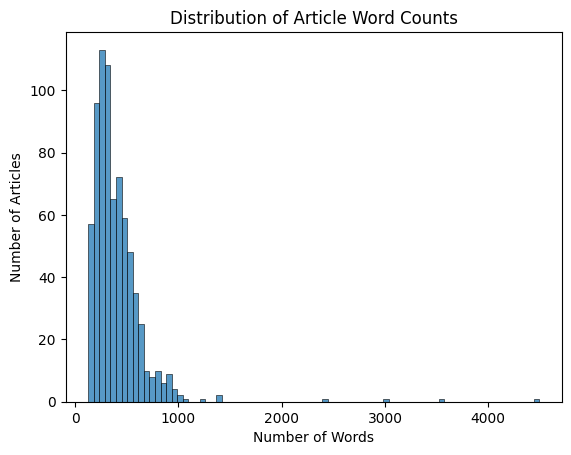

In [6]:
explore_dataframe(train_df, name="Raw Train Dataset")
explore_dataframe(test_df, "Raw Test Dataset")


## Data Cleaning 

Data integrity checks and basic cleaning:
* Duplicate texts or article IDs
* excess white space and leading whitespace
* URLs, numbers
* Weird punctuation
* non-ascii characters
* weird tokens (like too short or too long words)
* letter case (turn to lowercase)
* mispellings in words

For simplicity and reproducibility everytime the notebook is ran, a "data integrity check" function is defined. It includes checks for all of the above items. 

A separate function is defined that resolves the issues that come up in the integrity check function.

In [7]:
import re
def integrity_check(df,text_col = 'Text', id_col=None, sample_size=5):
    # Run Integrity checks on a text sample
    #   Args: 
        #   df (pd.Dataframe): DataFrame containing Text series (or text columnn to check)
        #   text_col (str) : name of the column in df that contains text
        #   id_col (str) : optional, article ID column for reference
        #   sample_size (int) : number of sample rows to show per issue

    results = {}

    # Check Duplicates
    duplicate_ids = df[df.duplicated(subset = id_col, keep=False)]
    results["Duplicate_id"] = duplicate_ids if not duplicate_ids.empty else None
    
    duplicate_texts = df[df.duplicated(subset = text_col, keep=False)]
    results["Duplicate_texts"] = duplicate_texts if not duplicate_texts.empty else None

    # Check Empty Texts
    empty_texts = df[df[text_col].str.strip() == '']
    results['Empty_texts'] = empty_texts if not empty_texts.empty else None

    # Excess WhiteSpaces
    whitespace = df[df[text_col].str.contains(r'\s{2,}', na=False)]
    results['Excess_whitespace'] = whitespace if not whitespace.empty else None
    
    # URLs
    urls = df[df[text_col].str.contains(r'http[s]?://|www\.', regex = True, na=False)]
    results['URLs'] = urls if not urls.empty else None

    # Numerical Values
    has_numbers = df[df[text_col].str.contains(r'\d', na=False)]
    results["numerical_values"] = has_numbers if not has_numbers.empty else None

    # Weird Punctuation
    weird_punct = df[df[text_col].str.contains(r'([!?.,])\1{2,}', regex=True, na=False)]
    results['Weird_punctuation'] = weird_punct if not weird_punct.empty else None

    # non-AsCII characters
    non_ascii = df[df[text_col].apply(lambda x: any(ord(ch) > 127 for ch in str(x)))]
    results['Non_ASCII'] = non_ascii if not non_ascii.empty else None

    # Weird tokens
    weird_tokens = df[df[text_col].apply(lambda x: any(len(w) > 25 for w in str(x).split()))]
    results['Weird_tokens'] = weird_tokens if not weird_tokens.empty else None

    # Print Summary of Results
    print("=== Integrity Check Summary ===")
    for k, v in results.items():
        print(f"{k}: {0 if v is None else len(v)} issues found")

    # Show samples
    print("\n === Sample Rows ===")
    for k,v in results.items():
        if v is not None:
            print(f"\n{k} (showing {min(sample_size, len(v))} rows):")
            display(v[[id_col,text_col]].head(sample_size) if id_col else v[[text_col]].head(sample_size))

    return results

In [ ]:
def clean_dataframe(df, text_col='Text', id_col=None):
    # Clean the dataframe by removing duplicates, empty texts, excess whitespace,
    # URLs, numerical values, weird punctuation, non-ASCII characters, and weird tokens.
    
    # Args:
        # df (pd.DataFrame): Input dataframe with a text column
        # text_col (str): Column name of text
        # id_col (str, optional): Optional ID column name
    
    # Returns:
        # pd.DataFrame: Cleaned dataframe

    cleaned_df = df.copy()

    # Duplicate texts and ArticleIds
    cleaned_df = cleaned_df.drop_duplicates(subset=[text_col])
    cleaned_df = cleaned_df.drop_duplicates(subset=[id_col]) 

    # Empty text
    cleaned_df = cleaned_df[cleaned_df[text_col].str.strip() != '']

    # Excess WhiteSpaces
    cleaned_df[text_col] = cleaned_df[text_col].str.replace(r'\s{2,}', ' ', regex=True).str.strip()

    # URLs
    cleaned_df[text_col] = cleaned_df[text_col].str.replace(r'http[s]?://\S+|www\.\S+', '<URL>', regex=True)

    # Numerical values
    cleaned_df[text_col] = cleaned_df[text_col].str.replace(r'\d+(\.\d+)?', '<NUM>', regex=True)

    # Weird punctuation (replace repeated sequences with single instance)
    cleaned_df[text_col] = cleaned_df[text_col].str.replace(r'([!?.,])\1{2,}', r'\1', regex=True)

    # Non-ASCII characters
    cleaned_df[text_col] = cleaned_df[text_col].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', str(x)))

    # Weird tokens (words >25 chars)
    cleaned_df[text_col] = cleaned_df[text_col].apply(
        lambda x: ' '.join([w for w in str(x).split() if len(w) <= 25])
    )

    # Reset index after cleaning
    cleaned_df = cleaned_df.reset_index(drop=True)

    return cleaned_df


In [19]:
issues_raw_Train = integrity_check(train_df, text_col='Text', id_col='ArticleId')

=== Integrity Check Summary ===
Duplicate_id: 0 issues found
Duplicate_texts: 100 issues found
Empty_texts: 0 issues found
Excess_whitespace: 1490 issues found
URLs: 2 issues found
numerical_values: 1424 issues found
Weird_punctuation: 94 issues found
Non_ASCII: 435 issues found
Weird_tokens: 1 issues found

 === Sample Rows ===

Duplicate_texts (showing 5 rows):


C:\Users\neeva\AppData\Local\Temp\ipykernel_15968\4108898204.py:36: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  weird_punct = df[df[text_col].str.contains(r'([!?.,])\1{2,}', regex=True, na=False)]


,ArticleId,Text
35,687,musical treatment for capra film the classic f...
62,476,prince crowned top music earner prince earne...
63,2017,what high-definition will do to dvds first it ...
71,2144,camera phones are must-haves four times more...
102,1680,security warning over fbi virus the us feder...



Excess_whitespace (showing 5 rows):


,ArticleId,Text
0,1833,worldcom ex-boss launches defence lawyers defe...
1,154,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...
3,1976,lifestyle governs mobile choice faster bett...
4,917,enron bosses in $168m payout eighteen former e...



URLs (showing 2 rows):


,ArticleId,Text
15,1588,wenger signs new deal arsenal manager arsene w...
1308,912,warning over tsunami aid website net users are...



numerical_values (showing 5 rows):


,ArticleId,Text
0,1833,worldcom ex-boss launches defence lawyers defe...
1,154,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...
3,1976,lifestyle governs mobile choice faster bett...
4,917,enron bosses in $168m payout eighteen former e...



Weird_punctuation (showing 5 rows):


,ArticleId,Text
10,1683,blair rejects iraq advice calls tony blair has...
45,455,tv station refuses adoption show a tv station ...
55,1418,blair buys copies of new band aid prime minist...
61,180,arsenal may seek full share listing arsenal ...
86,2127,boris opposes mayor apology ken livingstone sh...



Non_ASCII (showing 5 rows):


,ArticleId,Text
0,1833,worldcom ex-boss launches defence lawyers defe...
4,917,enron bosses in $168m payout eighteen former e...
9,1866,fockers fuel festive film chart comedy meet th...
12,1028,uk coal plunges into deeper loss shares in uk ...
13,812,bp surges ahead on high oil price oil giant bp...



Weird_tokens (showing 1 rows):


,ArticleId,Text
132,1945,hard act to follow for outkast us rap duo outk...


In [20]:
clean_train_df = clean_dataframe(train_df, text_col='Text', id_col='ArticleId')

In [21]:
issues_clean_Train = integrity_check(clean_train_df, text_col='Text', id_col='ArticleId')

=== Integrity Check Summary ===
Duplicate_id: 0 issues found
Duplicate_texts: 0 issues found
Empty_texts: 0 issues found
Excess_whitespace: 0 issues found
URLs: 0 issues found
numerical_values: 0 issues found
Weird_punctuation: 0 issues found
Non_ASCII: 0 issues found
Weird_tokens: 0 issues found

 === Sample Rows ===


C:\Users\neeva\AppData\Local\Temp\ipykernel_15968\4108898204.py:36: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  weird_punct = df[df[text_col].str.contains(r'([!?.,])\1{2,}', regex=True, na=False)]


Exploring Cleaned Train Dataset

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ArticleId    1440 non-null   int64 
 1   Text         1440 non-null   object
 2   Category     1440 non-null   object
 3   Word_count   1440 non-null   int64 
 4   text_length  1440 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 56.4+ KB

--- Word Count  ---
count    1440.000000
mean      385.215278
std       212.166965
min        90.000000
25%       253.000000
50%       337.000000
75%       468.250000
max      3345.000000
Name: Word_count, dtype: float64

--- Text Length ---
count     1440.000000
mean      2224.832639
std       1202.614299
min        501.000000
25%       1452.000000
50%       1957.500000
75%       2734.750000
max      18369.000000
Name: text_length, dtype: float64

--- Missing Values ---
Number of null texts: 0

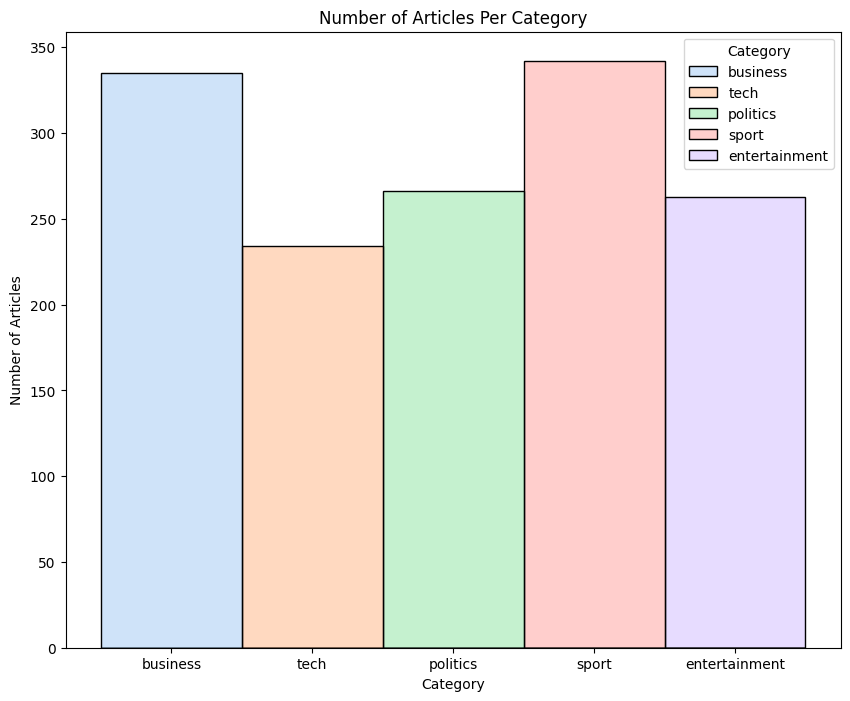

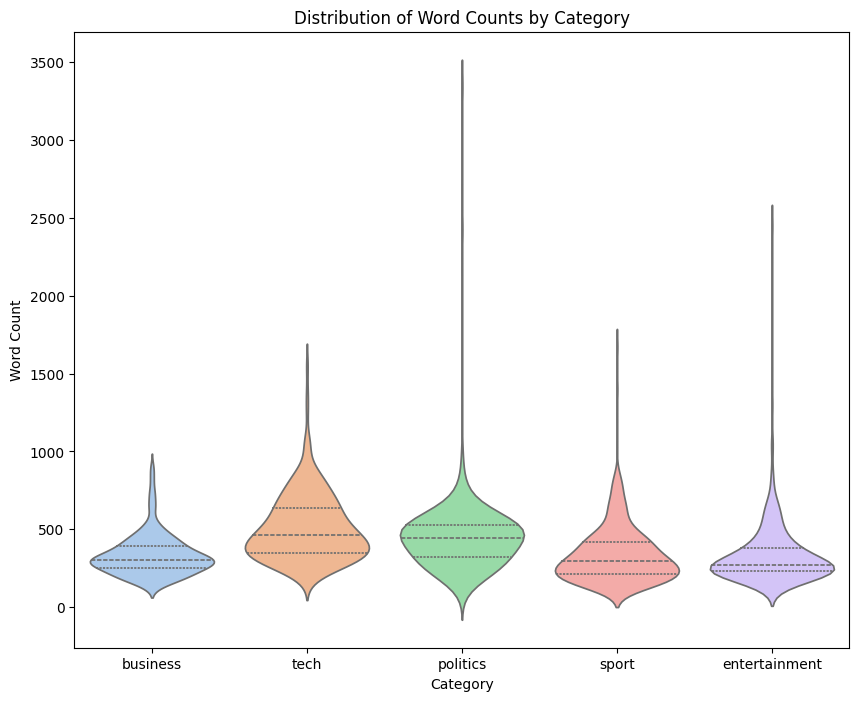

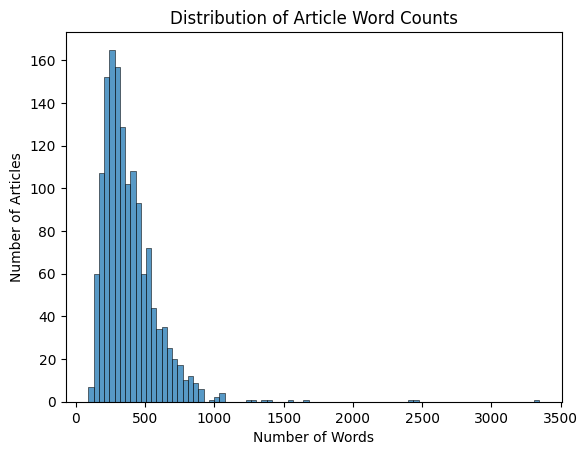

In [22]:
explore_dataframe(clean_train_df, name="Cleaned Train Dataset")


In [23]:
issues_raw_Test = integrity_check(test_df, text_col='Text', id_col='ArticleId')

=== Integrity Check Summary ===
Duplicate_id: 0 issues found
Duplicate_texts: 26 issues found
Empty_texts: 0 issues found
Excess_whitespace: 735 issues found
URLs: 1 issues found
numerical_values: 692 issues found
Weird_punctuation: 42 issues found
Non_ASCII: 212 issues found
Weird_tokens: 5 issues found

 === Sample Rows ===

Duplicate_texts (showing 5 rows):


C:\Users\neeva\AppData\Local\Temp\ipykernel_15968\4108898204.py:36: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  weird_punct = df[df[text_col].str.contains(r'([!?.,])\1{2,}', regex=True, na=False)]


,ArticleId,Text
38,1581,bookmakers back aviator for oscar the aviator ...
148,1067,famed music director viotti dies conductor mar...
213,1622,bookmakers back aviator for oscar the aviator ...
255,931,apple attacked over sources row civil libertie...
257,1207,speak easy plan for media players music and fi...



Excess_whitespace (showing 5 rows):


,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...



URLs (showing 1 rows):


,ArticleId,Text
89,1775,warning over tsunami aid website net users are...



numerical_values (showing 5 rows):


,ArticleId,Text
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...
6,2025,blair blasts tory spending plans tony blair ha...



Weird_punctuation (showing 5 rows):


,ArticleId,Text
19,516,india to deport bollywood actress india has or...
54,671,dvd copy protection strengthened dvds will be ...
60,244,tindall wants second opinion england centre mi...
62,1944,apple sues to stop product leaks computer firm...
63,725,tory expert denies defeat warning the conserva...



Non_ASCII (showing 5 rows):


,ArticleId,Text
3,459,india s reliance family feud heats up the ongo...
6,2025,blair blasts tory spending plans tony blair ha...
9,397,tsunami to hit sri lanka banks sri lanka s b...
13,2134,ibm puts cash behind linux push ibm is spendin...
14,297,cage film s third week at us top nicolas cage ...



Weird_tokens (showing 5 rows):


,ArticleId,Text
163,127,ibm frees 500 software patents computer giant ...
194,258,sporting rivals go to extra time the current s...
315,1905,no half measures with half-life 2 could half-l...
515,1501,smartphones suffer skulls attack owners of som...
562,1507,collins banned in landmark case sprinter miche...


In [24]:
clean_test_df = clean_dataframe(test_df, text_col='Text', id_col='ArticleId')

In [25]:
issues_clean_Test = integrity_check(clean_test_df, text_col='Text', id_col='ArticleId')

=== Integrity Check Summary ===
Duplicate_id: 0 issues found
Duplicate_texts: 0 issues found
Empty_texts: 0 issues found
Excess_whitespace: 0 issues found
URLs: 0 issues found
numerical_values: 0 issues found
Weird_punctuation: 0 issues found
Non_ASCII: 0 issues found
Weird_tokens: 0 issues found

 === Sample Rows ===


C:\Users\neeva\AppData\Local\Temp\ipykernel_15968\4108898204.py:36: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  weird_punct = df[df[text_col].str.contains(r'([!?.,])\1{2,}', regex=True, na=False)]


Exploring Cleaned Test Dataset

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ArticleId    722 non-null    int64 
 1   Text         722 non-null    object
 2   Word_count   722 non-null    int64 
 3   text_length  722 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 22.7+ KB

--- Word Count  ---
count     722.000000
mean      401.048476
std       296.704552
min       126.000000
25%       246.000000
50%       337.000000
75%       490.500000
max      4492.000000
Name: Word_count, dtype: float64

--- Text Length ---
count      722.000000
mean      2311.649584
std       1634.764930
min        715.000000
25%       1422.750000
50%       1966.500000
75%       2867.250000
max      25263.000000
Name: text_length, dtype: float64

--- Missing Values ---
Number of null texts: 0
Number of empty article texts: 0
Number of 

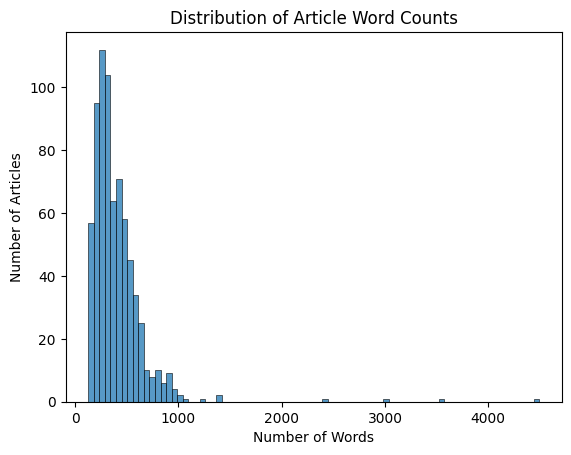

In [26]:
explore_dataframe(clean_test_df, name="Cleaned Test Dataset")


In [27]:
clean_train_df.to_csv('../data/interim/clean_train_df.csv')
clean_test_df.to_csv('../data/interim/clean_test_df.csv')